<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/SUPPORT2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

# Abstract
This project looks to investigate and find key factors that exist in determining the different causes and factors that hint towards the existence of a specific disease. This project will be accomplished by using the dataset SUPPORT2 in the UC Irvine Machine Learning Repository, using discriminative factors such as blood type, chemical levels, and more to isolate correlations. This will be done through the 42 features offered by the set, looking to differentiate between nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. We will use the feature set from the listed dataset to find specific relations between certain features that will indicate towards the existence of critical diseases found today.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Data Wrangling/Cleaning and Exploratory Data Analysis (EDA)

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
support2 = fetch_ucirepo(id=880)

First we take a look at the descriptions of the variables in this dataset:

In [4]:
pd.set_option('display.max_colwidth', None)

full_info = pd.DataFrame({
    'Variable Name': support2.variables['name'],
    'Description': support2.variables['description']
})
full_info

Variable Name  \
0             id   
1            age   
2          death   
3            sex   
4       hospdead   
5           slos   
6         d.time   
7        dzgroup   
8        dzclass   
9         num.co   
10           edu   
11        income   
12         scoma   
13       charges   
14        totcst   
15       totmcst   
16       avtisst   
17          race   
18           sps   
19           aps   
20        surv2m   
21        surv6m   
22          hday   
23      diabetes   
24      dementia   
25            ca   
26         prg2m   
27         prg6m   
28           dnr   
29        dnrday   
30        meanbp   
31          wblc   
32           hrt   
33          resp   
34          temp   
35          pafi   
36           alb   
37          bili   
38          crea   
39           sod   
40            ph   
41       glucose   
42           bun   
43         urine   
44          adlp   
45          adls   
46         sfdm2   
47         adlsc   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Description  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              None  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Age of the patients in years  
2                                                                                                                                                                                                                                                                                                                           Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.  
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Gender of the patient. Listed values are {male, female}.  
4                                                                                                                                                                                                                                                                                                                                                               

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','ca','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]
df

age     sex  death            dzgroup  scoma   race        sps  \
0     62.84998    male      0        Lung Cancer    0.0  other  33.898438   
1     60.33899  female      1          Cirrhosis   44.0  white  52.695312   
2     52.74698  female      1          Cirrhosis    0.0  white  20.500000   
3     42.38498  female      1        Lung Cancer    0.0  white  20.097656   
4     79.88495  female      0  ARF/MOSF w/Sepsis   26.0  white  23.500000   
...        ...     ...    ...                ...    ...    ...        ...   
9100  66.07300    male      0  ARF/MOSF w/Sepsis    0.0  white  16.296875   
9101  55.15399  female      0               Coma   41.0  white  25.796875   
9102  70.38196    male      0  ARF/MOSF w/Sepsis    0.0  white  22.699219   
9103  47.01999    male      1       MOSF w/Malig    0.0  white  40.195312   
9104  81.53894  female      1  ARF/MOSF w/Sepsis    0.0  white  18.097656   

       aps  diabetes  dementia  ...       wblc    hrt  resp      temp  \
0     20.0         0         0  ...   6.000000   69.0  22.0  36.00000   
1     74.0         0         0  ...  17.097656  112.0  34.0  34.59375   
2     45.0         0         0  ...   8.500000   88.0  28.0  37.39844   
3     19.0         0         0  ...   9.099609   88.0  32.0  35.00000   
4     30.0         0         0  ...  13.500000  112.0  20.0  37.89844   
...    ...       ...       ...  ...        ...    ...   ...       ...   
9100  22.0         0         0  ...   7.399414  104.0  22.0  35.69531   
9101  31.0         0         0  ...        NaN    0.0   8.0  38.59375   
9102  39.0         0         0  ...   8.398438   83.0  24.0  36.69531   
9103  51.0         0         0  ...   7.599609  110.0  24.0  36.39844   
9104   7.0         1         0  ...   8.599609   69.0  24.0  36.19531   

           pafi       alb      bili      crea    sod        ph  
0     388.00000  1.799805  0.199982  1.199951  141.0  7.459961  
1      98.00000       NaN       NaN  5.500000  132.0  7.250000  
2     231.65625       NaN  2.199707  2.000000  134.0  7.459961  
3           NaN       NaN       NaN  0.799927  139.0       NaN  
4     173.31250       NaN       NaN  0.799927  143.0  7.509766  
...         ...       ...       ...       ...    ...       ...  
9100  280.00000  3.699707  0.399963  1.099854  131.0  7.459961  
9101  218.50000       NaN       NaN  5.899414  135.0  7.289062  
9102  180.00000       NaN  0.399963  2.699707  139.0  7.379883  
9103  428.56250  1.199951  0.399963  3.500000  135.0  7.469727  
9104  230.40625  4.500000  0.599976  1.199951  137.0  7.289062  

[9105 rows x 22 columns]

In [ ]:
df.shape

(9105, 22)

In [ ]:
print("Number of observations:", len(df))

Number of observations: 9105


In [ ]:
df.isnull().sum()

age            0
sex            0
death          0
dzgroup        0
scoma          1
race          42
sps            1
aps            1
diabetes       0
dementia       0
ca             0
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
dtype: int64

In [6]:
print(df.dzgroup.unique())
print(df.race.unique())
print(df.ca.unique())

['Lung Cancer' 'Cirrhosis' 'ARF/MOSF w/Sepsis' 'Coma' 'CHF' 'Colon Cancer'
 'COPD' 'MOSF w/Malig']
['other' 'white' 'black' 'hispanic' 'asian' nan]
['metastatic' 'no' 'yes']


In [7]:
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

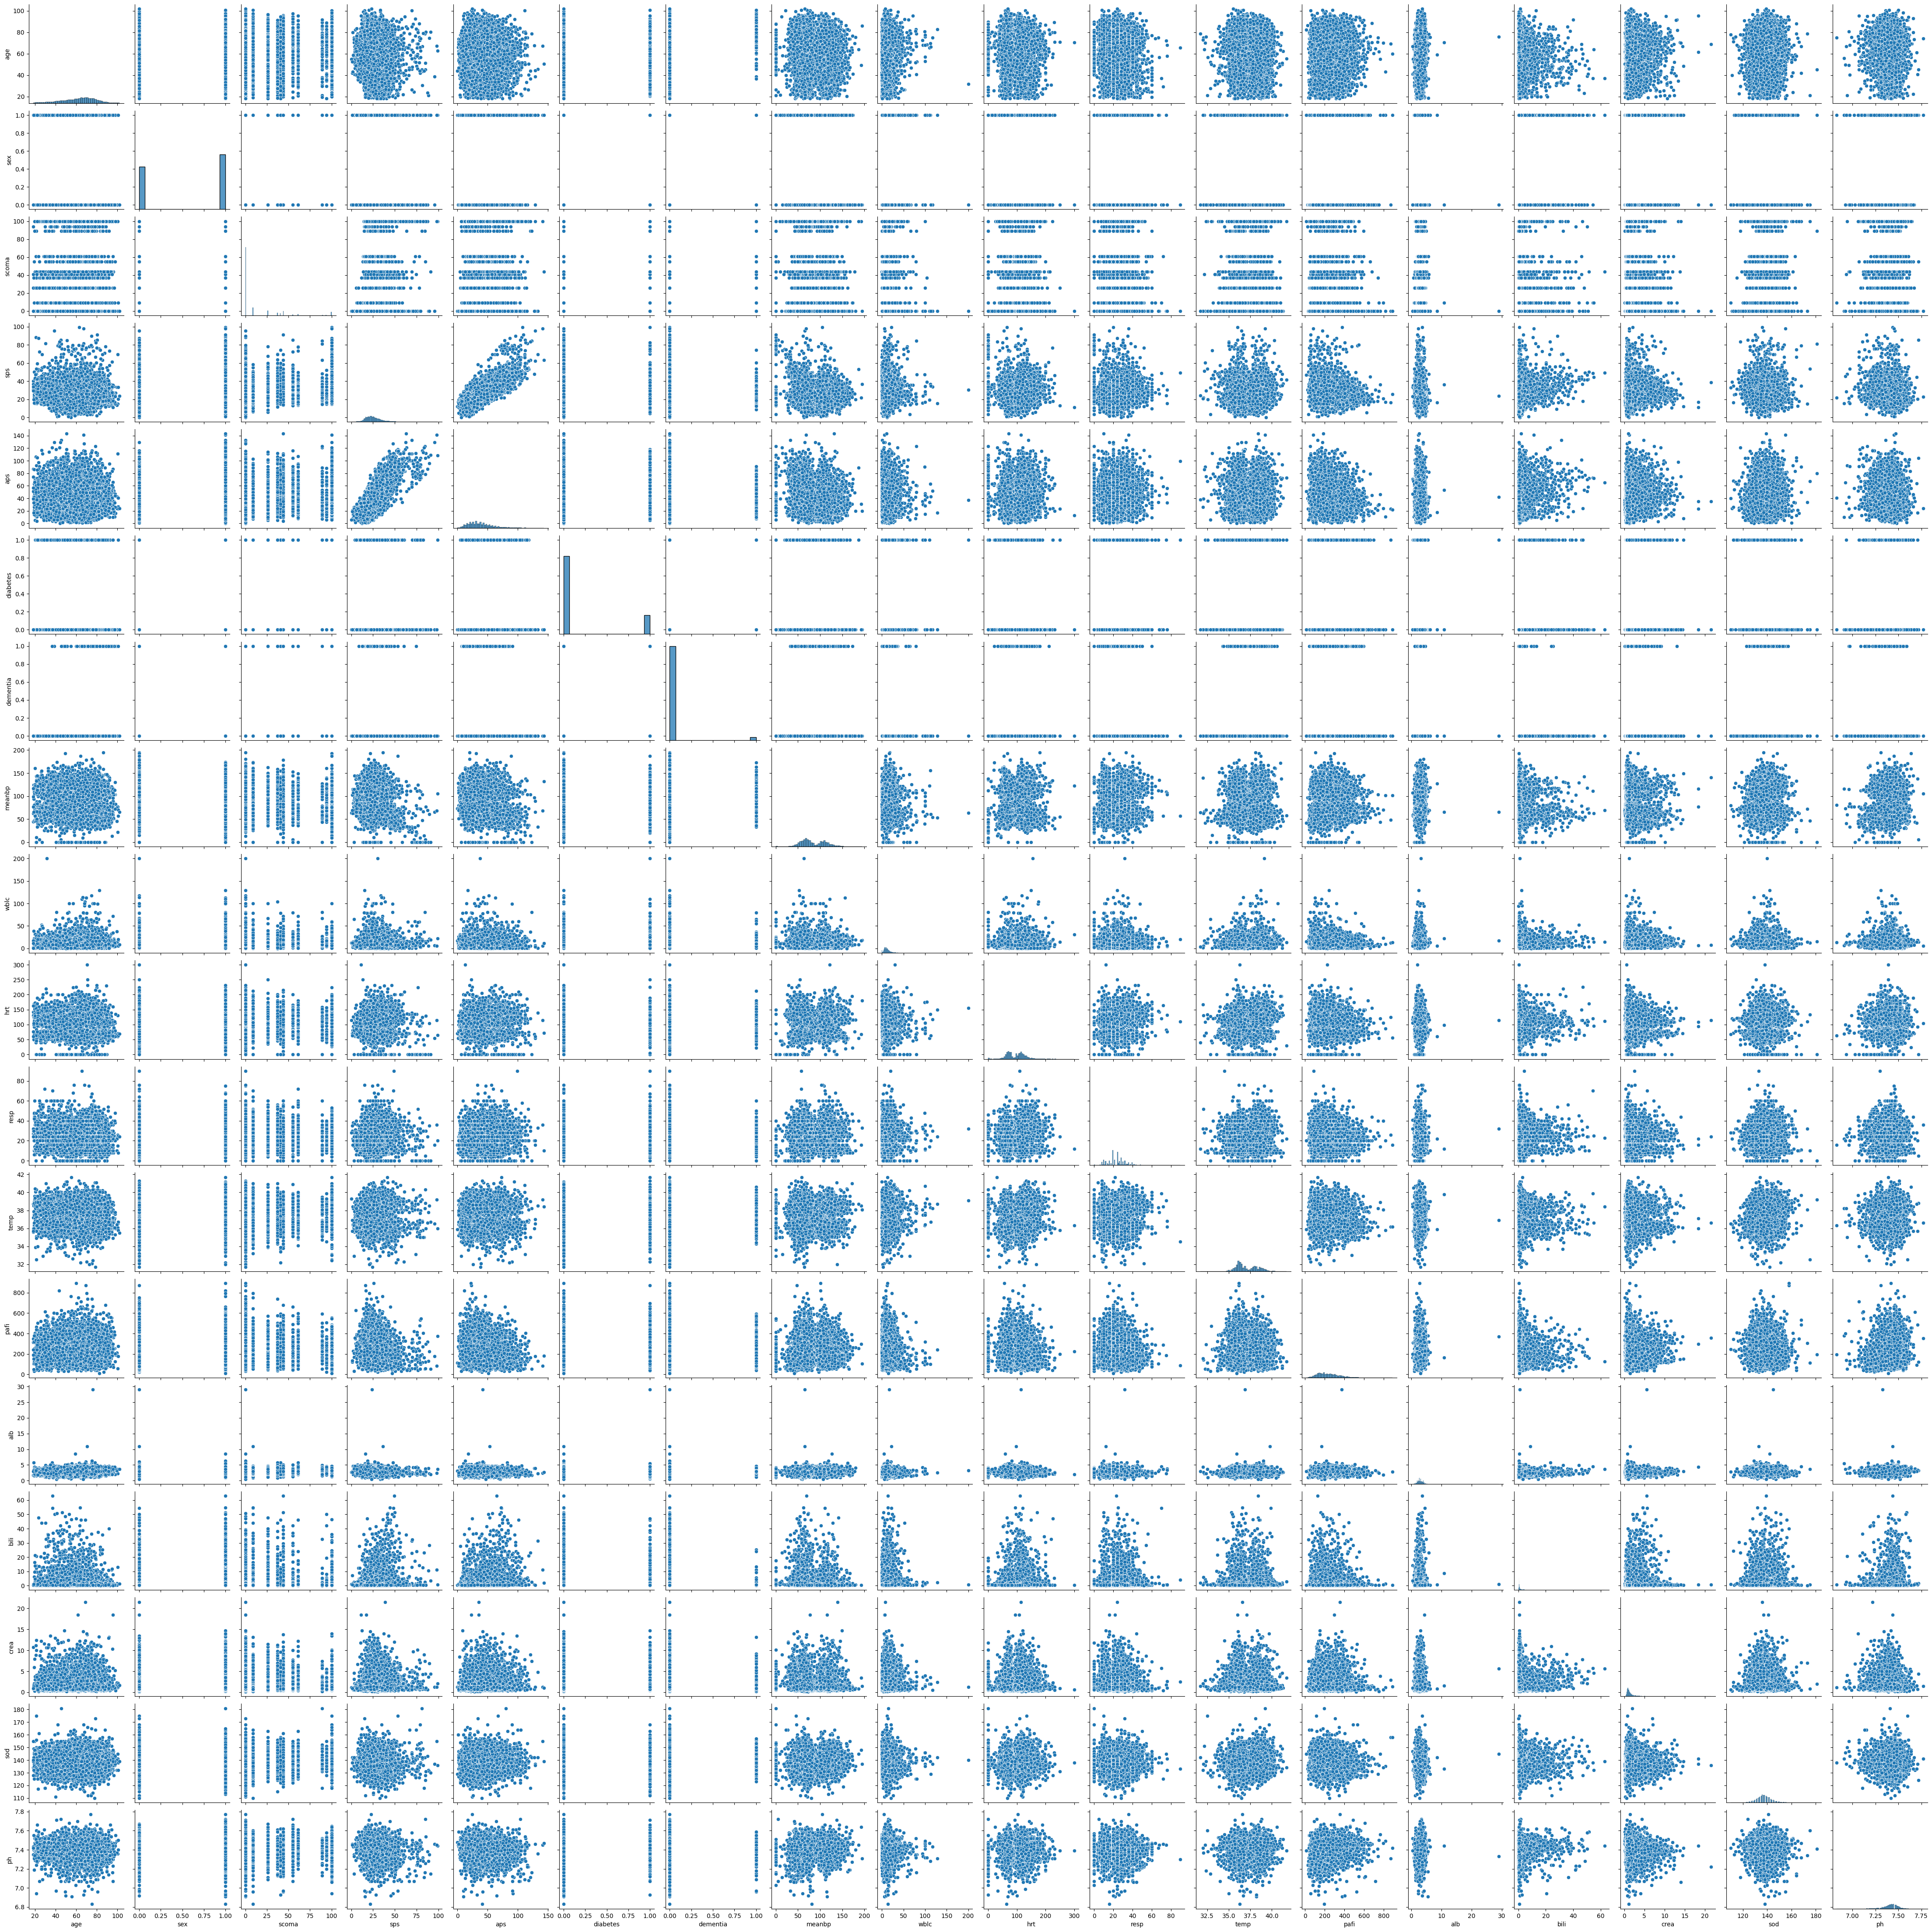

In [ ]:
sns.pairplot(df)

In [8]:
ohe = OneHotEncoder()
list1 = ['dzgroup', 'race', 'ca']
for i in list1:
  myohedzgroup = ohe.fit_transform(df[i].values.reshape(-1,1)).toarray()
  myohedzgroup=pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])
  df=df.drop([i], axis=1)
  df=pd.concat([df,myohedzgroup],axis=1)

df = df.dropna(axis = 0, how = 'any')
df.drop(df.columns[32], axis=1)

age  sex  death  scoma        sps   aps  diabetes  dementia  \
0     62.84998    1      0    0.0  33.898438  20.0         0         0   
6     62.37097    1      1    0.0  17.296875  46.0         0         0   
17    63.66299    0      1   26.0  40.296875  58.0         0         0   
22    49.61298    0      0    0.0  31.699219  42.0         0         0   
25    53.84000    1      1    0.0  14.199219  16.0         0         0   
...        ...  ...    ...    ...        ...   ...       ...       ...   
9091  79.17596    1      0    9.0  22.097656  28.0         0         0   
9099  68.61597    0      0    0.0  15.298828  19.0         0         0   
9100  66.07300    1      0    0.0  16.296875  22.0         0         0   
9103  47.01999    1      1    0.0  40.195312  51.0         0         0   
9104  81.53894    0      1    0.0  18.097656   7.0         1         0   

      meanbp       wblc  ...  Lung Cancer  MOSF w/Malig  asian  black  \
0       97.0   6.000000  ...          1.0           0.0    0.0    0.0   
6       78.0  11.699219  ...          0.0           0.0    0.0    0.0   
17      69.0  30.097656  ...          0.0           0.0    0.0    0.0   
22      67.0  11.000000  ...          0.0           0.0    0.0    0.0   
25     134.0   7.799805  ...          0.0           0.0    0.0    0.0   
...      ...        ...  ...          ...           ...    ...    ...   
9091    80.0  15.798828  ...          0.0           0.0    0.0    0.0   
9099    71.0  12.599609  ...          0.0           0.0    0.0    0.0   
9100   109.0   7.399414  ...          0.0           0.0    0.0    0.0   
9103    99.0   7.599609  ...          0.0           1.0    0.0    0.0   
9104    75.0   8.599609  ...          0.0           0.0    0.0    0.0   

      hispanic  other  white  metastatic   no  yes  
0          0.0    1.0    0.0         1.0  0.0  0.0  
6          0.0    0.0    1.0         0.0  1.0  0.0  
17         0.0    0.0    1.0         0.0  1.0  0.0  
22         0.0    0.0    1.0         0.0  1.0  0.0  
25         0.0    0.0    1.0         0.0  1.0  0.0  
...        ...    ...    ...         ...  ...  ...  
9091       0.0    0.0    1.0         0.0  1.0  0.0  
9099       0.0    0.0    1.0         0.0  0.0  1.0  
9100       0.0    0.0    1.0         0.0  1.0  0.0  
9103       0.0    0.0    1.0         0.0  0.0  1.0  
9104       0.0    0.0    1.0         0.0  1.0  0.0  

[3840 rows x 35 columns]

In [ ]:
print(df.isnull().any().sum())

0


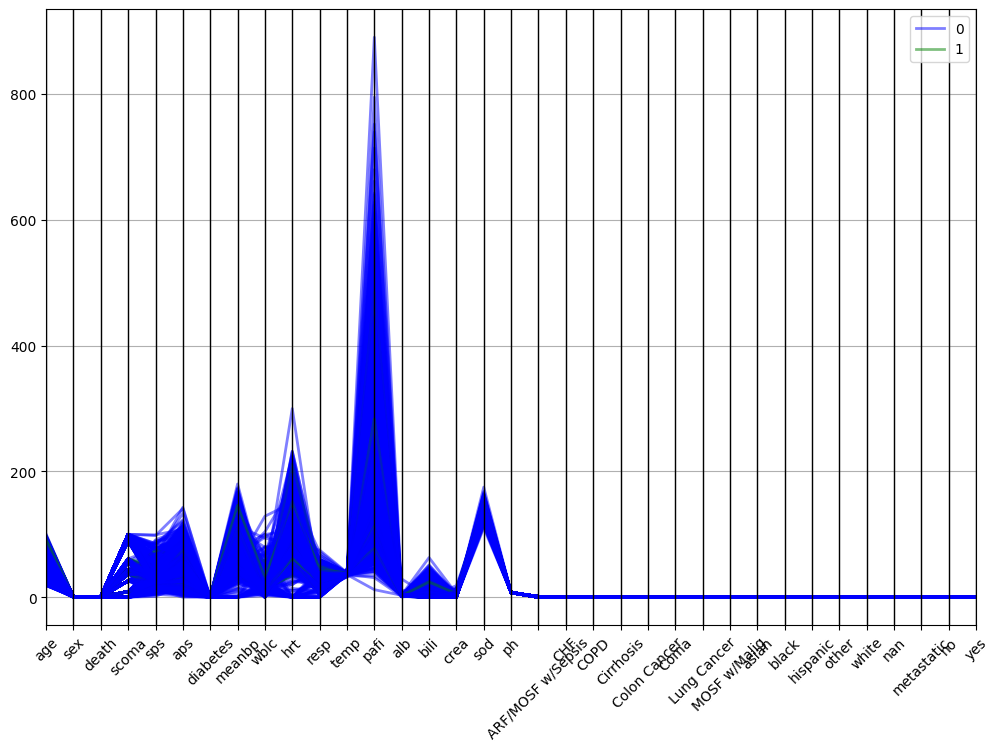

In [ ]:
# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(12, 8))
parallel_coordinates(df, 'dementia', alpha=0.5, color=['blue', 'green', 'red'], linewidth=2)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# plotly express interface
import plotly.express as px
df_ = df.copy()
# color     : Values from this column are used to assign color to the poly lines.
# dimensions: Values from these columns form the axes in the plot.
fig = px.parallel_coordinates(df_, color="age", dimensions=['age', 'sps', 'meanbp','scoma','aps'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

Citation: https://www.analyticsvidhya.com/blog/2021/11/visualize-data-using-parallel-coordinates-plot/#:~:text=A%20Parallel%20coordinates%20plot%20is,and%20parallel%20to%20each%20other.

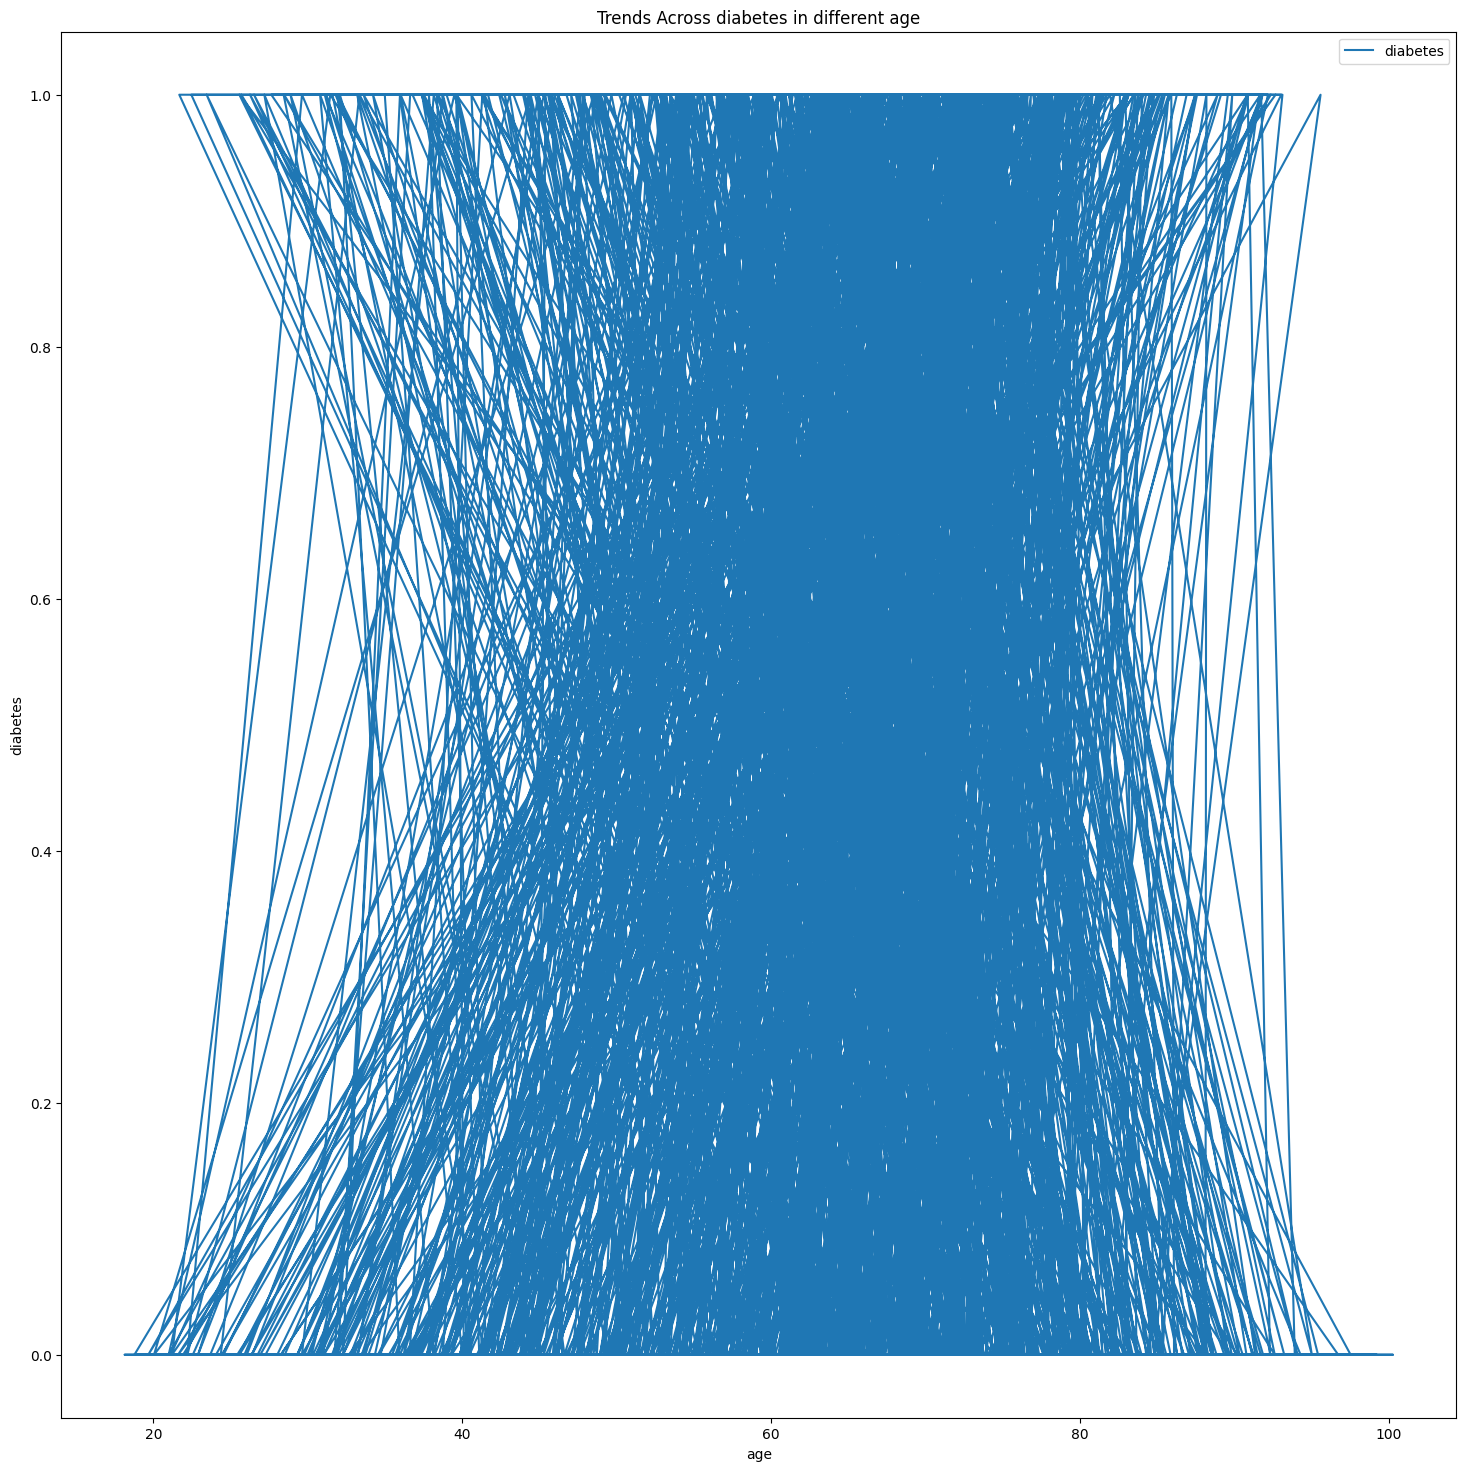

In [ ]:
# Multiple Line Plots (age - diabetes)
targets = ['diabetes']
plt.figure(figsize=(18, 18))
for target in targets:
    plt.plot(df['age'], df[target], label=target)

plt.legend()
plt.xlabel('age')
plt.ylabel('diabetes')
plt.title('Trends Across diabetes in different age')
plt.show()

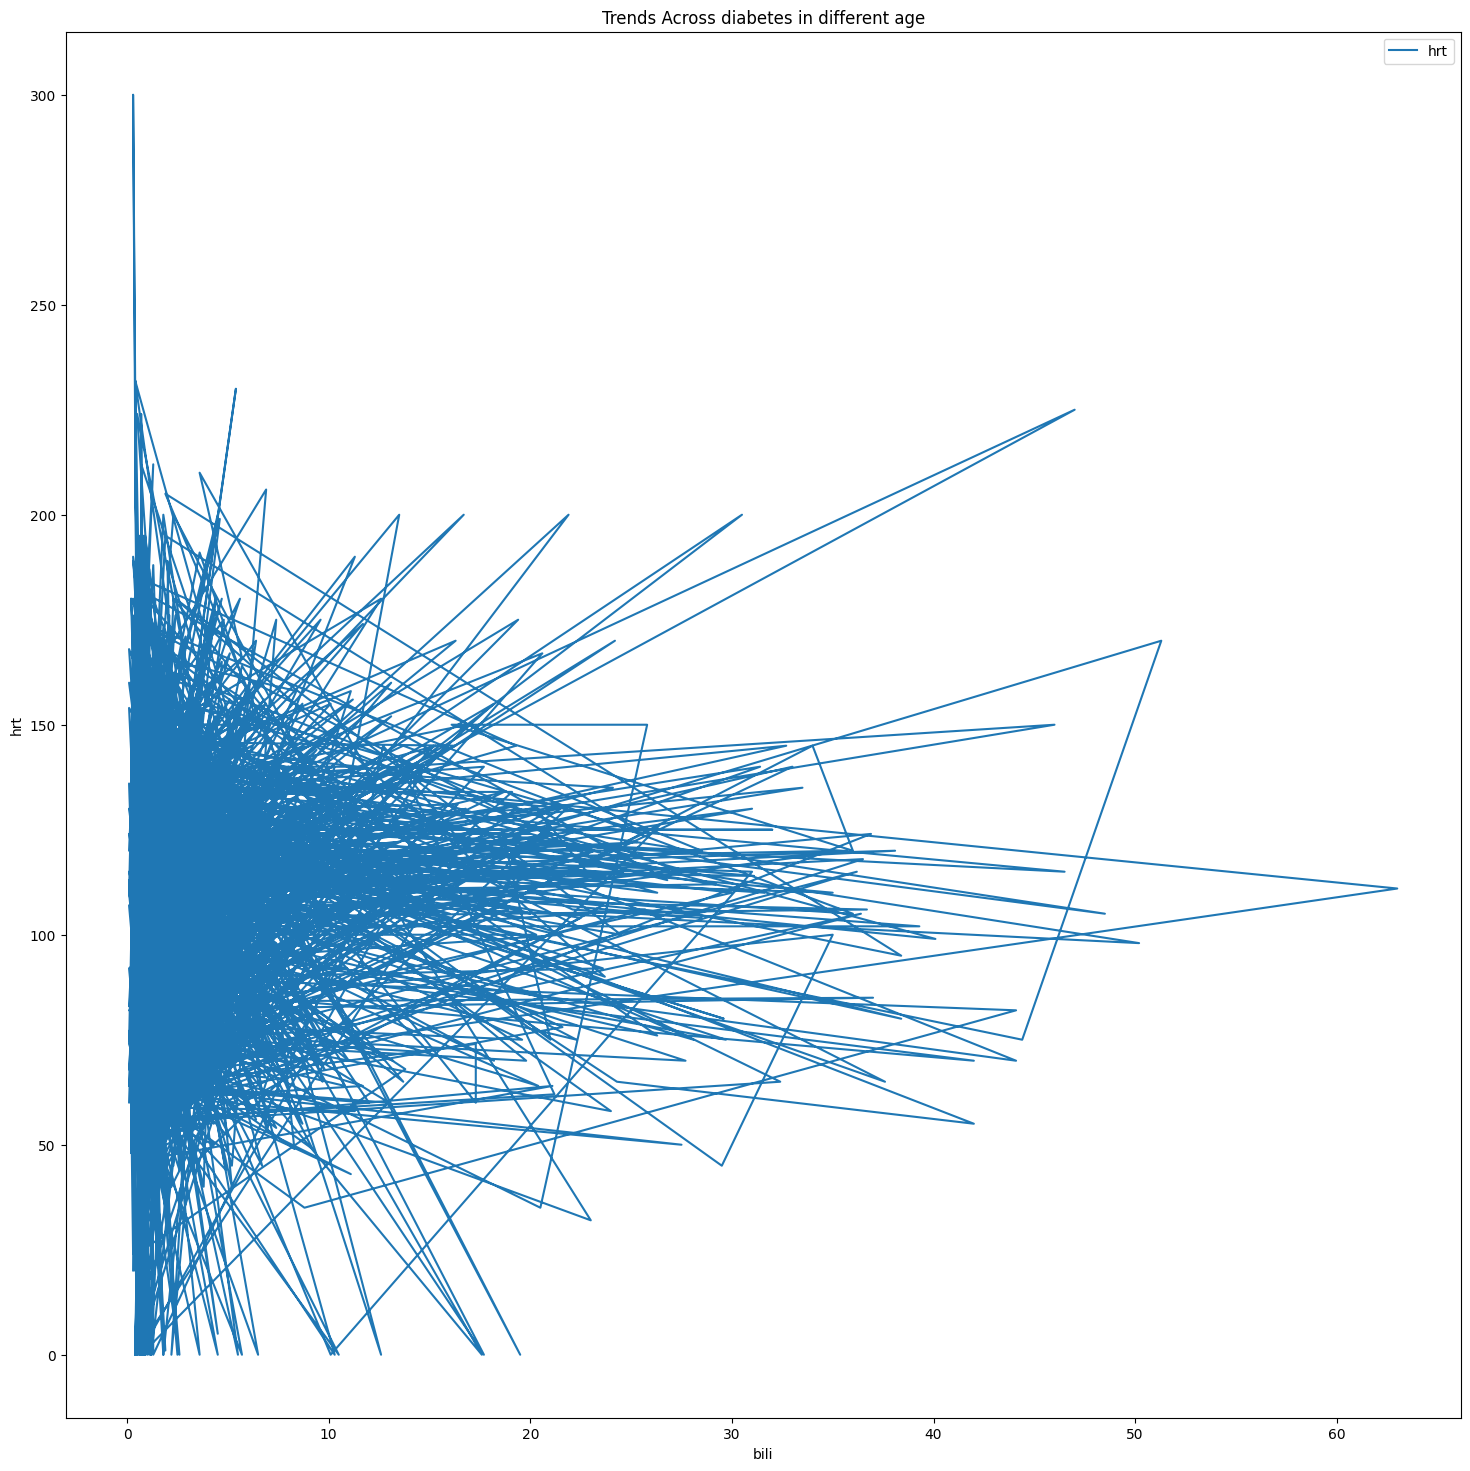

In [ ]:
# Multiple Line Plots
targets = ['hrt']
plt.figure(figsize=(18, 18))
for target in targets:
    plt.plot(df['bili'], df[target], label=target) # bilirubin

plt.legend()
plt.xlabel('bili')
plt.ylabel('hrt')
plt.title('Trends Across diabetes in different age')
plt.show()

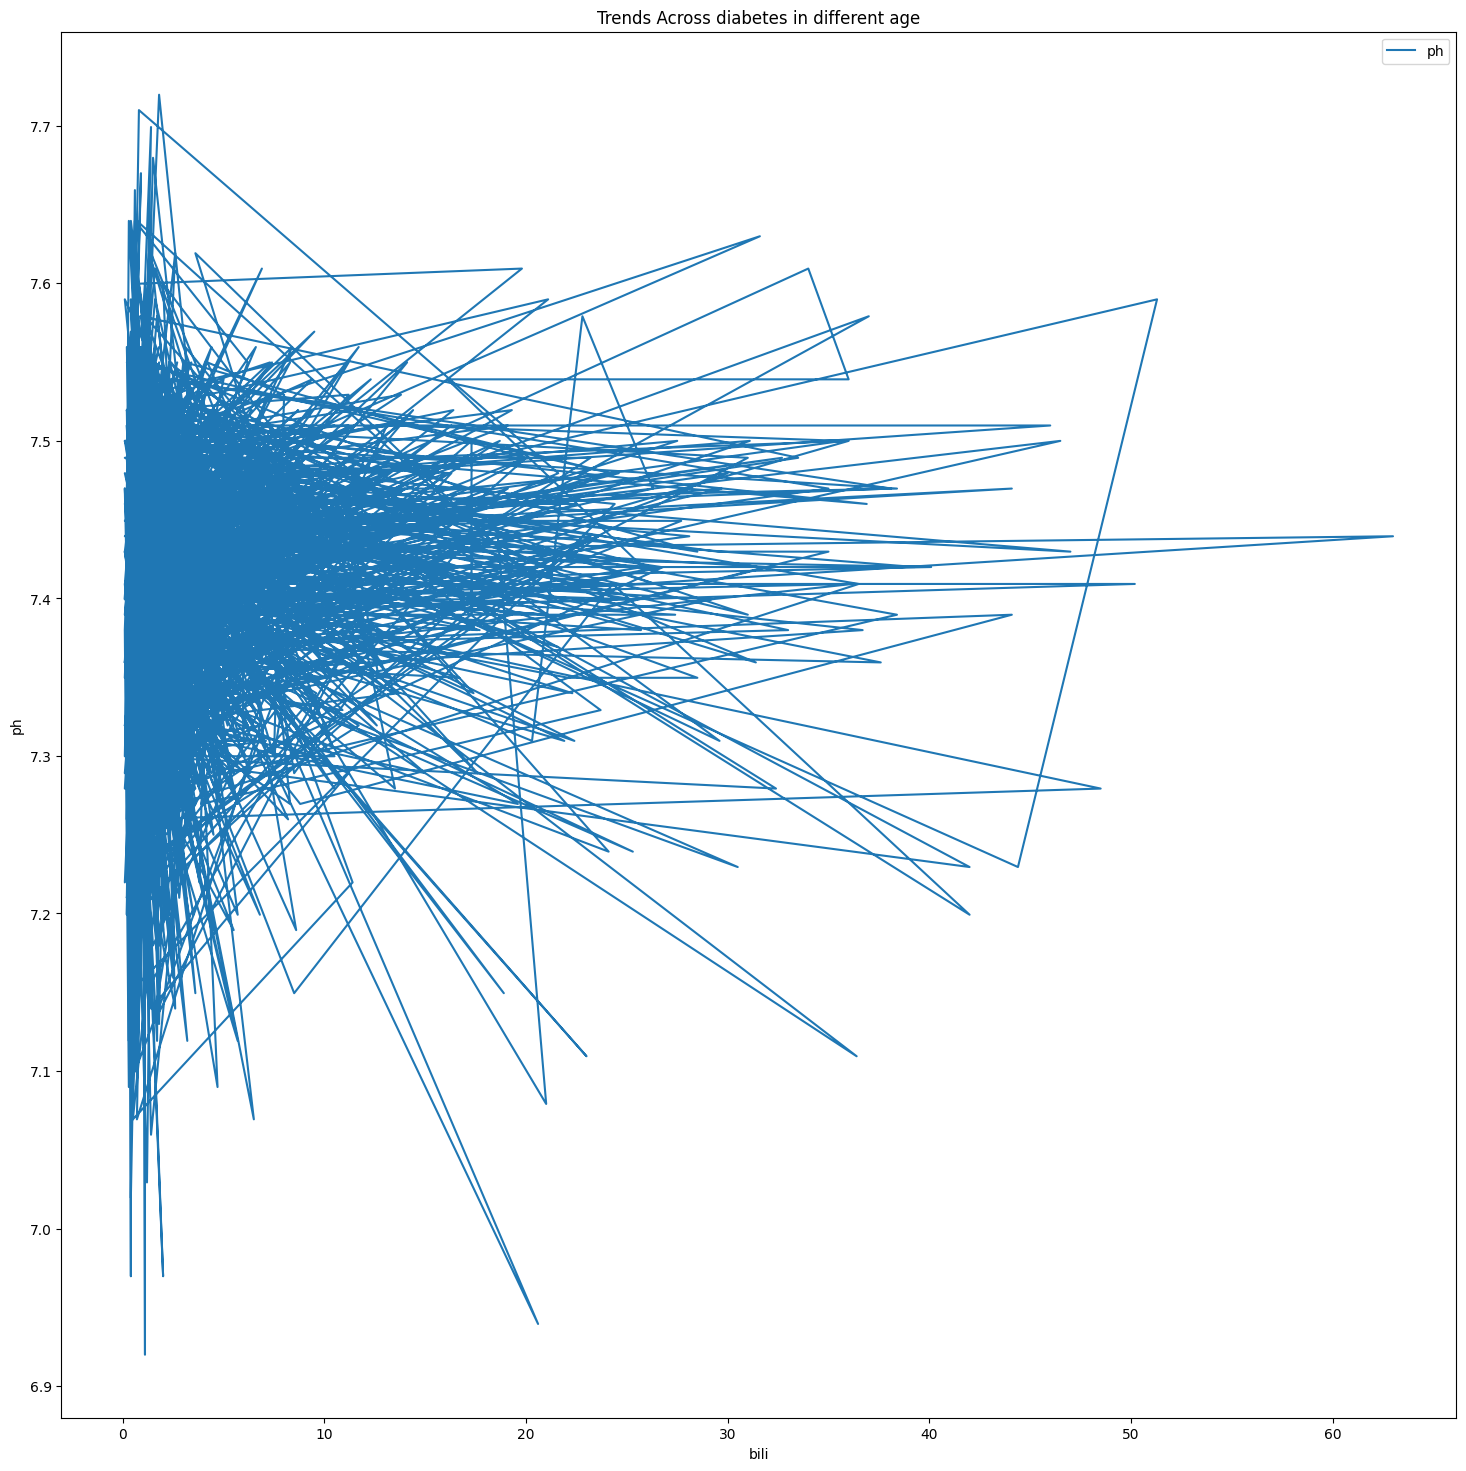

In [ ]:
# Multiple Line Plots
targets = ['ph']
plt.figure(figsize=(18, 18))
for target in targets:
    plt.plot(df['bili'], df[target], label=target)

plt.legend()
plt.xlabel('bili')
plt.ylabel('ph')
plt.title('Trends Across diabetes in different age')
plt.show()

# First Model - Logistic Regression

Now we will perform our first model, and we will use 'death' as the single target first. 'Death' is a binary variable that takes 1 if the patient died at any time up to National Death Index (NDI) data on 31 of December of 1994.

We also prepossed the features column using MinMax scaling to compare better the significance of coefficients in the logistic regression model.

In [9]:
# We first choose all other features excluding the binary variables, and death
features = df.iloc[:,:19].drop(['diabetes','dementia','death'], axis=1)
scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features

age  sex  scoma       sps       aps    meanbp      wblc       hrt  \
0     0.544507  1.0   0.00  0.333700  0.139860  0.538889  0.046591  0.230000   
1     0.538672  1.0   0.00  0.164275  0.321678  0.433333  0.090846  0.400000   
2     0.554409  0.0   0.26  0.398999  0.405594  0.383333  0.233711  0.360000   
3     0.383276  0.0   0.00  0.311257  0.293706  0.372222  0.085416  0.400000   
4     0.434763  1.0   0.00  0.132662  0.111888  0.744444  0.060566  0.353333   
...        ...  ...    ...       ...       ...       ...       ...       ...   
3835  0.743362  1.0   0.09  0.213269  0.195804  0.444444  0.122680  0.356667   
3836  0.614738  0.0   0.00  0.143884  0.132867  0.394444  0.097837  0.366667   
3837  0.583764  1.0   0.00  0.154070  0.153846  0.605556  0.057457  0.346667   
3838  0.351693  1.0   0.00  0.397962  0.356643  0.550000  0.059012  0.366667   
3839  0.772143  0.0   0.00  0.172447  0.048951  0.416667  0.066777  0.230000   

          resp      temp      pafi       alb      bili      crea       sod  \
0     0.293333  0.435004  0.428063  0.048945  0.001590  0.060112  0.476923   
1     0.373333  0.587086  0.338694  0.153840  0.004769  0.081967  0.338462   
2     0.293333  0.510620  0.163405  0.087410  0.220986  0.153014  0.307692   
3     0.640000  0.750213  0.214032  0.055945  0.063587  0.027324  0.307692   
4     0.293333  0.641462  0.332574  0.118875  0.006359  0.038251  0.476923   
...        ...       ...       ...       ...       ...       ...       ...   
3835  0.426667  0.401869  0.359755  0.090910  0.003180  0.032788  0.384615   
3836  0.133333  0.456245  0.140031  0.129358  0.007949  0.038251  0.276923   
3837  0.293333  0.401869  0.305109  0.115376  0.004769  0.054642  0.323077   
3838  0.320000  0.478335  0.474242  0.027972  0.004769  0.185809  0.384615   
3839  0.320000  0.456245  0.248648  0.143358  0.007949  0.060112  0.415385   

            ph  
0     0.675213  
1     0.699633  
2     0.661783  
3     0.599511  
4     0.575091  
...        ...  
3835  0.661783  
3836  0.711844  
3837  0.675213  
3838  0.687424  
3839  0.461537  

[3840 rows x 16 columns]

In [ ]:
# train the model
X_train, X_test, y_train, y_test = train_test_split(features, df['death'], test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logregmodel = logreg.fit(X_train, y_train)
yhat_train = logreg.predict(X_train)
yhat_test = logreg.predict(X_test)

In [ ]:
logreg.score(X_train, y_train)

0.6893601190476191

In [ ]:
logreg.score(X_test, y_test)

0.6892361111111112

In [ ]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.57      0.26      0.35       381
           1       0.71      0.90      0.80       771

    accuracy                           0.69      1152
   macro avg       0.64      0.58      0.57      1152
weighted avg       0.66      0.69      0.65      1152



<Axes: xlabel='Features'>

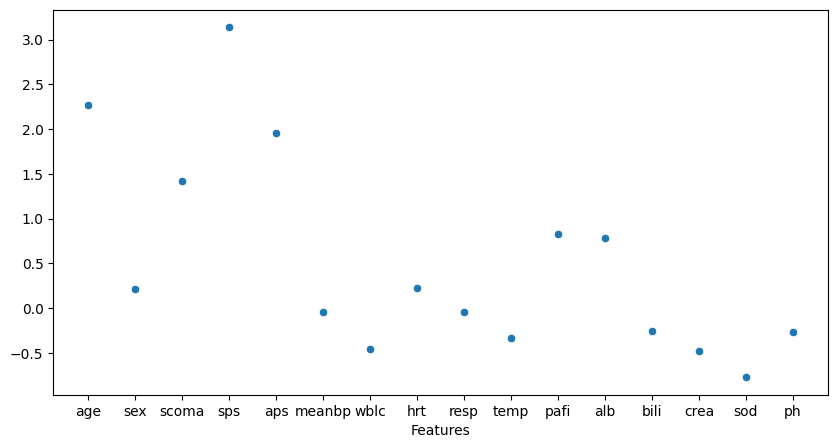

In [ ]:
# We take a look at the model coefficient
plt.figure(figsize=(10, 5))
plt.xlabel('Features')
sns.scatterplot(x = features.columns, y = logreg.coef_[0])

In [ ]:
e=np.exp(1)
for i in logreg.coef_[0]:
  print(e**i)

9.670254373092256
1.2343802095680947
4.15430255946646
23.052665915940878
7.109658137967708
0.9597531899373652
0.6340972833811189
1.252265700306472
0.9573305461406694
0.7156120091565772
2.2861385146250925
2.1832186824265234
0.7793185127213277
0.6202719020753988
0.4628354974127657
0.7647403027580798


This shows that if 'sps'(SUPPORT physiology score on day 3 (predicted by a model)) changes from its minimum value to its maximum value, the odds of death are 23.05 times higher, assuming all other variables in the model are held constant.

# Improve the accuracy of our Logistical Regression
We are trying to use the Hyperparameter tuning method to improve the accuracy, and it turns out there is little improvement.

Reference: https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

In [ ]:
param_grid = {
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'max_iter': [20, 50, 100, 500]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, verbose=0, n_jobs=-1)
final_model = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 1.623776739188721, 'max_iter': 20, 'solver': 'liblinear'}


In [ ]:
yhat_test = final_model.predict(X_test)

In [ ]:
y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("\nTest Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nTest Confusion Matrix:")
print(conf_matrix)

train_mse = mean_squared_error(y_train, y_train_pred)
print("\nTrain Mean Squared Error:")
print(train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTest Mean Squared Error:")
print(test_mse)

Training Accuracy: 0.6901041666666666

Test Accuracy: 0.6918402777777778

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.27      0.36       381
           1       0.71      0.90      0.80       771

    accuracy                           0.69      1152
   macro avg       0.64      0.58      0.58      1152
weighted avg       0.67      0.69      0.65      1152


Test Confusion Matrix:
[[101 280]
 [ 75 696]]

Train Mean Squared Error:
0.3098958333333333

Test Mean Squared Error:
0.3081597222222222


In [ ]:
X = features
y = df['death']

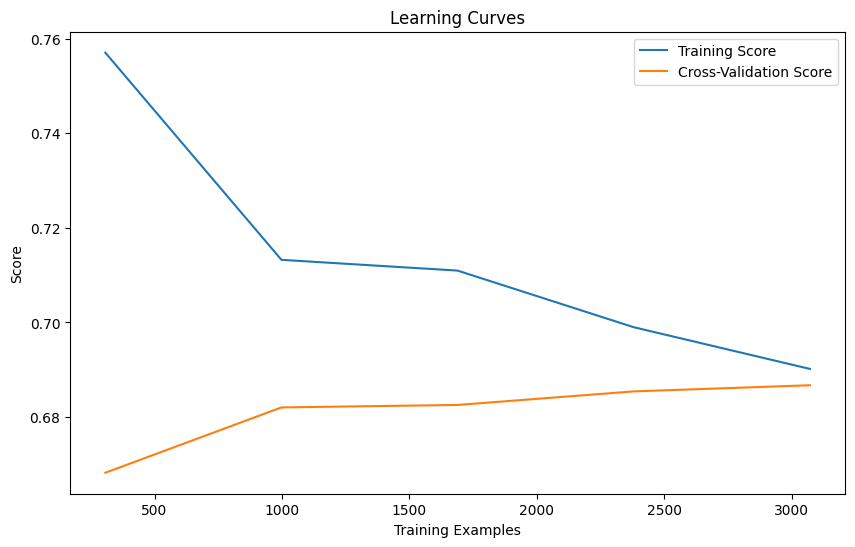

In [ ]:
from sklearn.model_selection import learning_curve

# Assuming you have X, y, and a model
train_sizes, train_scores, test_scores = learning_curve(final_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

Based on the following results, with a higher training score and a significantly lower cross-validation score, this indicates that there is overfitting in the model, and therefore may not be the best model for producing the correct output.

# Try other Targets
As we showed above, even we used Hyperparameter tuning method, the accuracy is still low. So we decide to try other targets (different diseases) from our table.

In [11]:
pip install scikeras

In [14]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [ ]:
# All diseases created by one-hot encoding
targets=df.iloc[:, 19:27]
targets

ARF/MOSF w/Sepsis  CHF  COPD  Cirrhosis  Colon Cancer  Coma  \
0                   0.0  0.0   0.0        0.0           0.0   0.0   
6                   0.0  1.0   0.0        0.0           0.0   0.0   
17                  1.0  0.0   0.0        0.0           0.0   0.0   
22                  1.0  0.0   0.0        0.0           0.0   0.0   
25                  0.0  0.0   1.0        0.0           0.0   0.0   
...                 ...  ...   ...        ...           ...   ...   
9091                0.0  0.0   1.0        0.0           0.0   0.0   
9099                0.0  0.0   1.0        0.0           0.0   0.0   
9100                1.0  0.0   0.0        0.0           0.0   0.0   
9103                0.0  0.0   0.0        0.0           0.0   0.0   
9104                1.0  0.0   0.0        0.0           0.0   0.0   

      Lung Cancer  MOSF w/Malig  
0             1.0           0.0  
6             0.0           0.0  
17            0.0           0.0  
22            0.0           0.0  
25            0.0           0.0  
...           ...           ...  
9091          0.0           0.0  
9099          0.0           0.0  
9100          0.0           0.0  
9103          0.0           1.0  
9104          0.0           0.0  

[3840 rows x 8 columns]

In [ ]:
for i in targets.columns:
  X_train, X_test, y_train, y_test = train_test_split(features, df[i], test_size=0.3, random_state=0)
  logreg = LogisticRegression(max_iter=1000)
  logregmodel = logreg.fit(X_train, y_train)
  yhat_train = logreg.predict(X_train)
  yhat_test = logreg.predict(X_test)
  print('The accuracy for predicting the disease '+ i + ' is: ' + str(logreg.score(X_test, y_test)))

The accuracy for predicting the disease ARF/MOSF w/Sepsis is: 0.6623263888888888
The accuracy for predicting the disease CHF is: 0.8706597222222222
The accuracy for predicting the disease COPD is: 0.8828125
The accuracy for predicting the disease Cirrhosis is: 0.9418402777777778
The accuracy for predicting the disease Colon Cancer is: 0.9800347222222222
The accuracy for predicting the disease Coma is: 0.9348958333333334
The accuracy for predicting the disease Lung Cancer is: 0.9348958333333334
The accuracy for predicting the disease MOSF w/Malig is: 0.9123263888888888


This shows that the logistic regression actually did pretty well on predicting some diseases, such as Colon Cancer.

In [17]:
features.shape

(3840, 16)

In [18]:
y= df.iloc[:, 19:27]
X= features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
def buildmodel():
    model = Sequential([
        Dense(units = 12, activation = 'sigmoid', input_dim = 16),
        Dense(units = 12, activation = 'sigmoid'),
        Dense(units = 12, activation = 'sigmoid'),
        Dense(units = 8, activation = 'sigmoid')
    ])
    model.compile(optimizer ='SGD', loss='mse')
    return(model)

estimator = KerasClassifier(model=buildmodel, epochs=100, batch_size=20, verbose=0)
kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
results = cross_val_score(estimator, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs = 1)

In [19]:
for i in range(len(results)):
  print("Accuracy values during interation " + str(i+1) + " is: " + str(results[i]))
print("Overall average accuracy is: " + str(results.mean()))

Accuracy values during interation 1 is: 0.43506493506493504
Accuracy values during interation 2 is: 0.4512987012987013
Accuracy values during interation 3 is: 0.46254071661237783
Accuracy values during interation 4 is: 0.46254071661237783
Accuracy values during interation 5 is: 0.4527687296416938
Accuracy values during interation 6 is: 0.44625407166123776
Accuracy values during interation 7 is: 0.4006514657980456
Accuracy values during interation 8 is: 0.4755700325732899
Accuracy values during interation 9 is: 0.48534201954397393
Accuracy values during interation 10 is: 0.4234527687296417
Overall average accuracy is: 0.4495484157536275


In [20]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [22]:
import keras
import keras_tuner
from keras import layers
#build the hyperparameter tuning model with tuning the units, activation function, and learning rates
def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(units=hp.Int('input_units', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('input_activation', values=['relu', 'tanh', 'sigmoid']),
                    input_dim=16))

    for i in range(3):
        model.add(layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32),
                        activation=hp.Choice("activation", values=['relu', 'tanh', 'sigmoid'])))

    model.add(layers.Dense(units=8, activation="sigmoid"))

    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [23]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="accuracy",
    max_trials=10,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)

In [24]:
tuner.search(X_train, y_train, epochs=50)

Trial 10 Complete [00h 02m 47s]
accuracy: 0.5480143427848816

Best accuracy So Far: 0.8787434995174408
Total elapsed time: 00h 16m 35s


In [25]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1632      
                                                                 
 dense_1 (Dense)             (None, 224)               21728     
                                                                 
 dense_2 (Dense)             (None, 224)               50400     
                                                                 
 dense_3 (Dense)             (None, 224)               50400     
                                                                 
 dense_4 (Dense)             (None, 8)                 1800      
                                                                 
Total params: 125960 (492.03 KB)
Trainable params: 125960 (492.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
